## Clustering
### k-means clustering
1. choose a number `k` and distance metric
2. find k nearest neighbors of sample that we want to classify
3. assign the class label by majority vote
4. update the centriods of each class
5. repeat steps above untill convergence

In [1]:
%pip install -r requirements.txt
# if error -> replace % with !

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.cluster import KMeans
import sklearn.datasets
import matplotlib.pyplot as plt

In [3]:
dataset = sklearn.datasets.load_iris(as_frame=True)

In [4]:
X = (dataset['data'].loc[:, ['sepal length (cm)', 'sepal width (cm)']])
y = dataset['target']
X

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [5]:
centroids = []

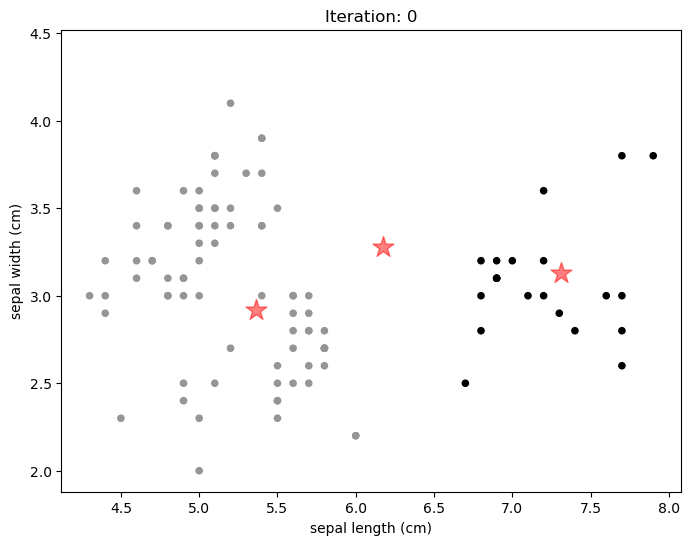

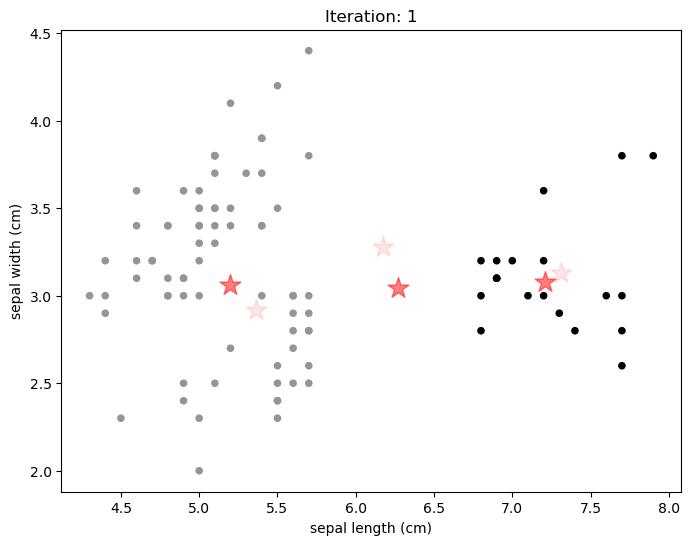

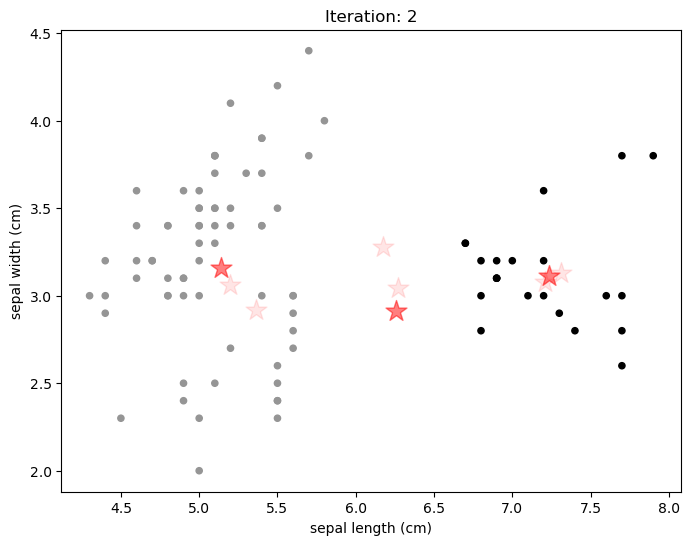

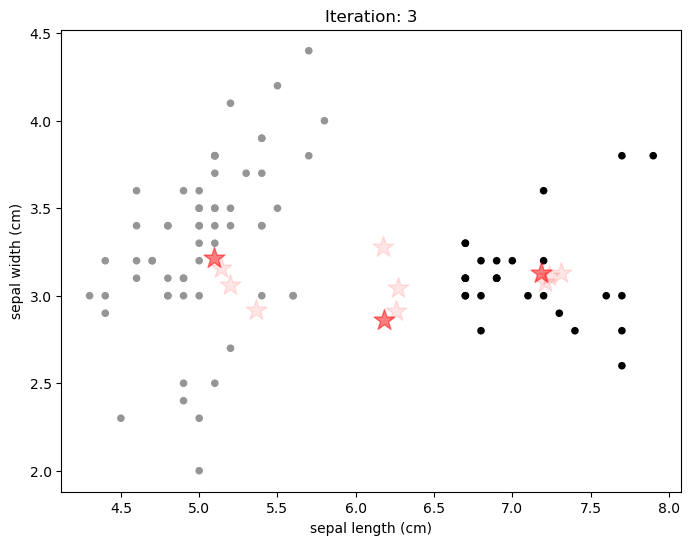

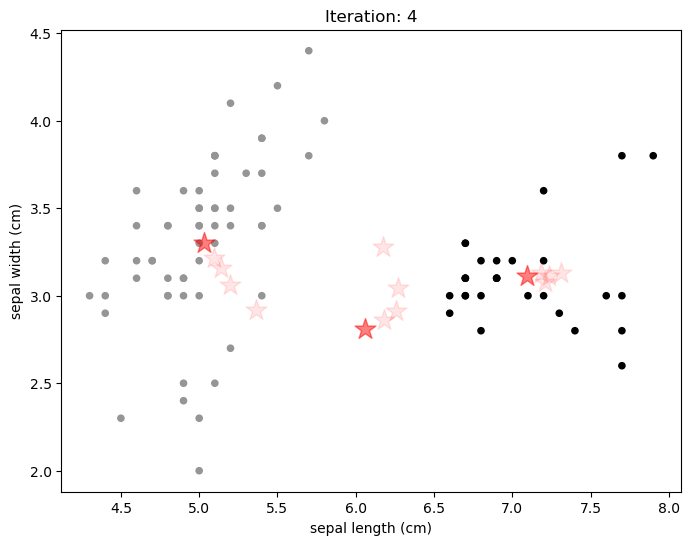

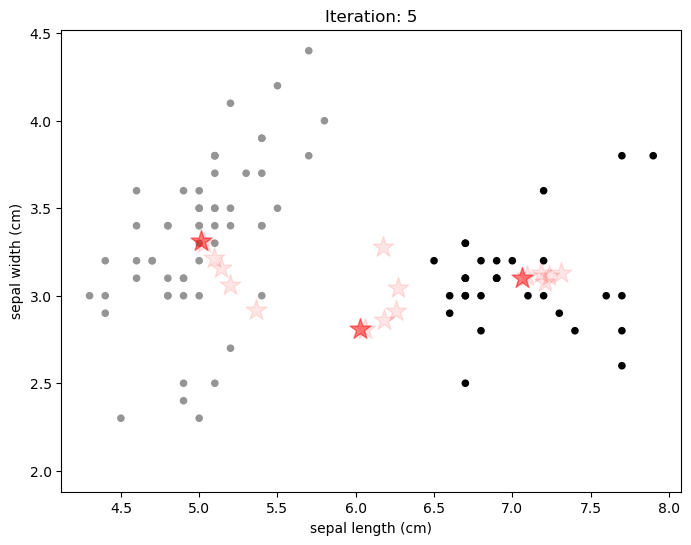

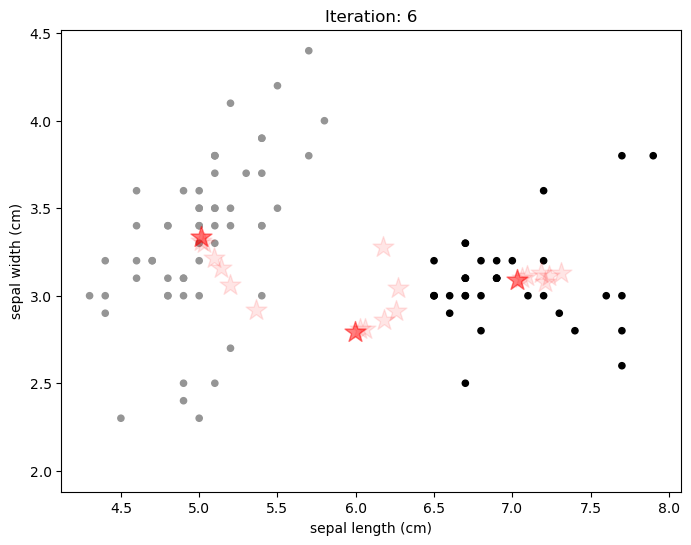

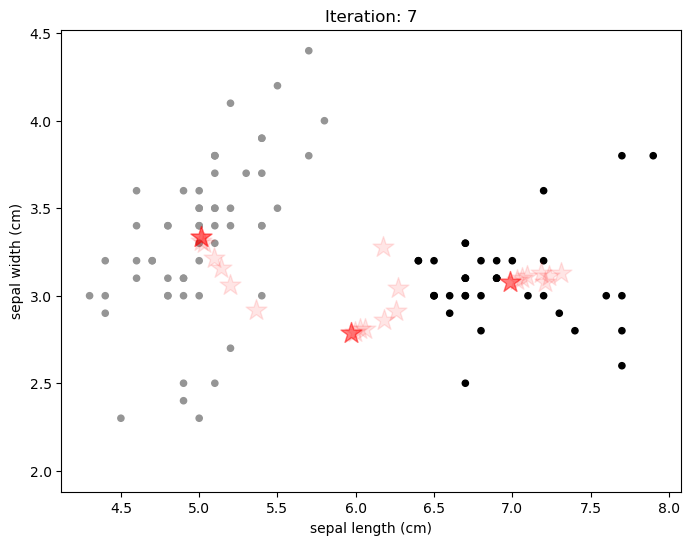

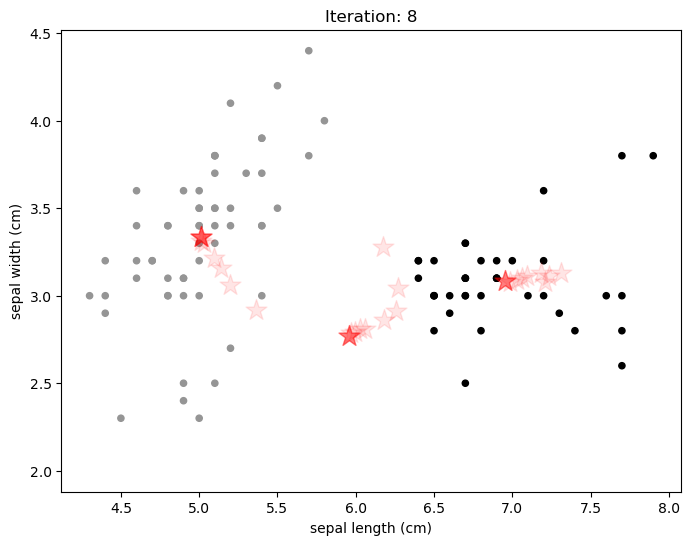

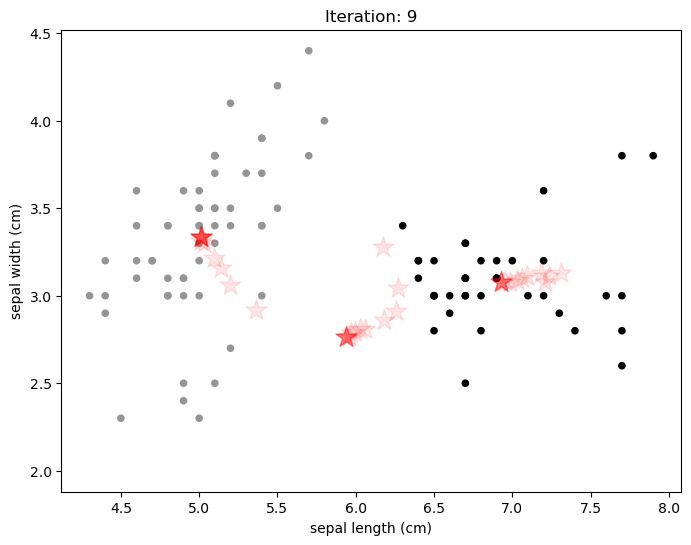

In [6]:
for i in range(10):
    model = KMeans(n_clusters=3, init='random', n_init=1, max_iter=i+1, random_state=42)
    model.fit(X)
    label = model.predict(X)

    fig, ax = plt.subplots(figsize=(8,6))
    X.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c=label, ax=ax)

    centers = model.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], marker='*', s=250, color='r', alpha=0.5)
    ax.set_title('Iteration: ' + str(i))

    if i > 0:
        for centroid in  centroids:
            ax.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=250, color='r', alpha=0.1)

    centroids.append(model.cluster_centers_)    

Text(0.5, 1.0, 'Original Data')

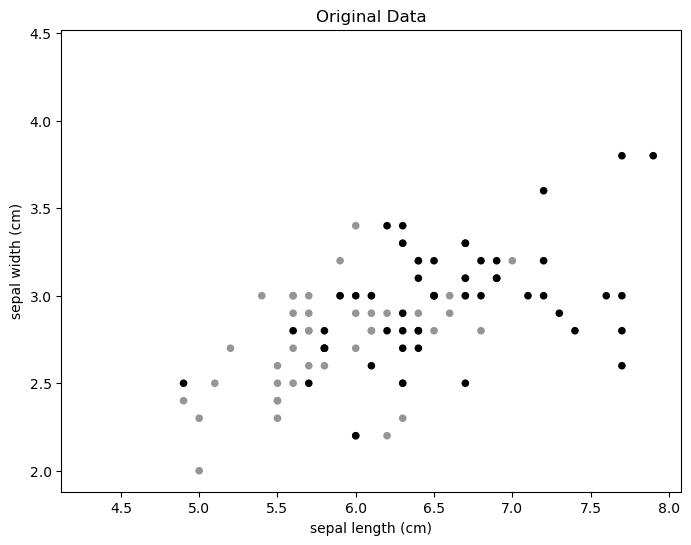

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
X.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c=y, ax=ax)
ax.set_title('Original Data')

## K Evaluation for K-Means
- we specify the `k value` for k-means clustering. However, we do not know the best `k value` for given dataset
### 1. Elbow Method
- track the intertia of model as `k value` increases, the inertia is the sum of squared distances of samples to their closest cluster center
### 2. Silhouette coefficient
- the silhouette coefficient is a measure of how similar an object is to its own cluster compared to other clusters, ranges from -1 to +1

In [8]:
inertias = []
max_clusters = 20
for i in range(max_clusters):
    km = KMeans(n_clusters=i+1, n_init='auto', max_iter=300, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Method')

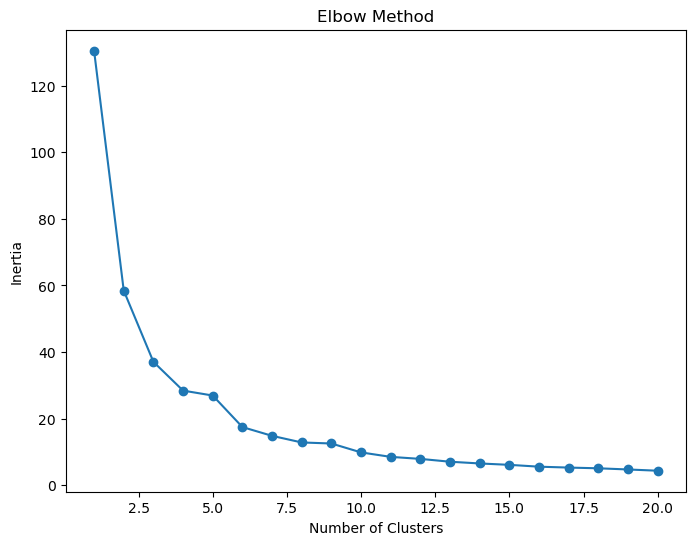

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, max_clusters+1), inertias, marker='o')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')
ax.set_title('Elbow Method')

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer, silhouette_visualizer
# visualizer by adding ?
# SilhouetteVisualizer?

In [11]:
import matplotlib
# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [12]:
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

In [ ]:
max_clusters = 6
for i in range(max_clusters):
    km = KMeans(n_clusters=i+2, n_init='auto', max_iter=300, random_state=42)

    fig, ax = plt.subplots(figsize=(8, 6))

    viz = silhouette_visualizer(km, X, colors='yellowbrick', ax=ax, show=False)

    ax.set_xlim([-0.1, 0.8])

# Understanding Clustering Results
we can use the following methods
- create a surrogate model to predict cluster label for given sample
- summarize the cluster by mean of each feature
- visualize the clustering result in 2D or 3D

In [17]:
from datasets import load_dataset
electricity = load_dataset('inria-soda/tabular-benchmark', data_files='clf_num/electricity.csv')

Generating train split: 38474 examples [00:00, 1117764.44 examples/s]


In [18]:
electricity

DatasetDict({
    train: Dataset({
        features: ['date', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer', 'class'],
        num_rows: 38474
    })
})

In [19]:
elec = electricity['train'].to_pandas()
elec

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.898987,0.957447,0.068632,0.568283,0.004456,0.456499,0.644737,DOWN
1,0.867616,0.234043,0.033716,0.337102,0.001672,0.329622,0.846930,DOWN
2,0.009159,0.255319,0.059175,0.185808,0.003467,0.422915,0.414912,DOWN
3,0.898987,0.531915,0.087577,0.539572,0.004936,0.637752,0.491667,DOWN
4,0.868280,0.085106,0.027021,0.165129,0.001271,0.265924,0.748246,DOWN
...,...,...,...,...,...,...,...,...
38469,0.915800,0.404255,0.077549,0.456263,0.005332,0.378560,0.356140,UP
38470,0.915800,0.425532,0.074397,0.444213,0.005110,0.377525,0.369737,UP
38471,0.915800,0.468085,0.072835,0.423386,0.005019,0.354480,0.380263,UP
38472,0.915800,0.829787,0.065420,0.353913,0.004508,0.319524,0.319737,UP


In [20]:
X = elec.drop(columns=['class'])

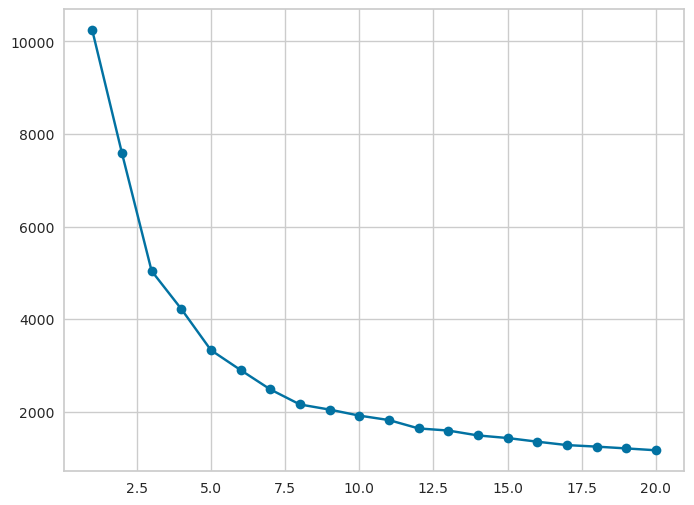

In [22]:
inertias = []
max_clusters = 20
for i in range(max_clusters):
    km = KMeans(n_clusters=i+1, n_init='auto', max_iter=300, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, max_clusters+1), inertias, marker='o')

In [ ]:
from yellowbrick.cluster import silhouette_visualizer
max_clusters = 6

for i in range(max_clusters):
    km = KMeans(n_clusters=i+2, n_init='auto', max_iter=300, random_state=42)

    fig, ax = plt.subplots(figsize=(8, 6))
    viz = silhouette_visualizer(km, X.sample(1_000, random_state=42), colors='yellowbrick', ax=ax, show=False)
    ax.set_xlim([-0.1, 0.8])

In [ ]:
km = KMeans(n_clusters=5, n_init='auto', max_iter=300, random_state=42)

km.fit(X)
label = km.predict(X)
(elec
 .assign(cluster=label)
 .groupby('cluster')
 .agg('mean', numeric_only=True)
 .T
 .style
 .background_gradient(cmap='RdBu', axis='columns')
)